<img src="cgpm_logo.png" alt="Drawing"/>



***

# Working with SEG-Y Data in Python

**Wes Hamlyn**
<br>
**8-Nov-2017**

***
# Outline

### 1. What is SEG-Y Format
### 2. Using **`auralib`** to work with SEG-Y
### 3. Examples

***
# What is SEG-Y Format

* ### SEG-Y is to seismic data as LAS is to well logs

* ### SEG-Y is a *binary* format so you cannot easily read/edit it using a text editor

* ### SEG-Y is frequently abused format with many (slight) deviations from the standard

### Main elements of a SEG-Y file...
<img src="segy_format_visual_01.png" alt="Drawing"/>


***
# What is **`auralib` **?

* ### A collection of tools for geophysics, rock physics, petrophysics, synthetics, and data I/O, etc.
* ### Written entirely in Python
* ### Includes a pretty reasonable library (**`auralib.segy`**) for reading/writing SEG-Y files
* ### Has a snappy logo
<br>
<img style="width: 150px; align: left;" src="auralib_logo_1.png"/> 
<br>
### https://github.com/whamlyn/auralib

***
# Using **`auralib`** to work with SEG-Y data
#### **`auralib`** has lots of stuff in it.  The bits relevant to working with SEG-Y data are:

## **`auralib.segy.Segy()`**
* #### A class containing all the tools you need for reading (and some for writing) SEG-Y data

## **`auralib.segyidx.SegyIndex()`**
* #### A class for indexing SEG-Y files to quickly find trace numbers corresponding to specific inlines/xlines
* #### Used in completement to **`auralib.segy.Segy()`**


***
## Example 1: Reading SEG-Y Headers
In this example we:
1. Use dictionaries to define the Binary and Trace Header keywords
1. Create a Segy object
1. Read and view the EBCDIC header
1. Read and view the Binary header (only the defined keywords)
1. Read and view the Trace headers (only the defined keywords)
<br>

In [35]:
# Import some required packages

import numpy as np
import matplotlib.pyplot as plt
import auralib as aura

In [36]:
# Next, we'll specify the path to a SEG-Y file (we'll look at the Blackfoot 3D)

sgyfile = r'C:\Users\whamlyn\Documents\Dropbox\data\Blackfoot\VERTIMIG.sgy'
print(sgyfile)

C:\Users\whamlyn\Documents\Dropbox\data\Blackfoot\VERTIMIG.sgy


In [37]:
# We need to give some information about the structure of the Binary Header
# auralib uses a python dictionary to do this.  Below are the minimum required
# fields, these have to be set or things with fail. Simply add a new dictionary 
# key with specification of the byte position, data format, and number of bytes.

def_bhead = {'num_samp': {'bpos': 21, 'fmt': '>h', 'nbyte': 2},
             'samp_fmt': {'bpos': 25, 'fmt': '>h', 'nbyte': 2},
             'samp_rate': {'bpos': 17, 'fmt': '>h', 'nbyte': 2}}

def_bhead

{'num_samp': {'bpos': 21, 'fmt': '>h', 'nbyte': 2},
 'samp_fmt': {'bpos': 25, 'fmt': '>h', 'nbyte': 2},
 'samp_rate': {'bpos': 17, 'fmt': '>h', 'nbyte': 2}}

In [38]:
# We need to do the same for the Trace Header structure. Below is an example of
# the trace header definition used for the VERTIMIG version of the Blackfoot 3D
# stack data.  Inlines are found in bytes 193-196 as a long integer that is 4 bytes
# in size.

def_thead = {'il': {'bpos': 193, 'fmt': 'l', 'nbyte': 4},
             'xl': {'bpos': 197, 'fmt': 'l', 'nbyte': 4},
             'cmpx': {'bpos': 185, 'fmt': 'ibm', 'nbyte': 4},
             'cmpy': {'bpos': 189, 'fmt': 'ibm', 'nbyte': 4},
             'idcode': {'bpos': 29, 'fmt': 'h', 'nbyte': 2}}

def_thead

{'cmpx': {'bpos': 185, 'fmt': 'ibm', 'nbyte': 4},
 'cmpy': {'bpos': 189, 'fmt': 'ibm', 'nbyte': 4},
 'idcode': {'bpos': 29, 'fmt': 'h', 'nbyte': 2},
 'il': {'bpos': 193, 'fmt': 'l', 'nbyte': 4},
 'xl': {'bpos': 197, 'fmt': 'l', 'nbyte': 4}}

In [39]:
# Now we can create a Segy object from the auralib.segy.Segy() class. This requires
# the path to the segy file and the Binary and Trace header definitions. I usually
# end up calling this "buf" simply because it is short and easy to type later on.

buf = aura.segy.Segy(sgyfile, def_thead, def_bhead)

buf

In [40]:
# Lets see what methods and attributes exist for the "buf" object

dir(buf)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_calc_endian',
 '_calc_numbytes',
 '_get_bhead',
 '_get_ebcdic_head',
 '_ibm2ieee_b',
 '_ibm2ieee_b_new',
 '_ibm2ieee_l',
 '_ibm2ieee_l_new',
 'bhead',
 'def_bhead',
 'def_thead',
 'ebcdic',
 'endian',
 'filename',
 'filesize',
 'fmt_str',
 'get_ilxl',
 'idx',
 'num_traces',
 'numbytes',
 'read_tdata',
 'read_tdata_multi',
 'read_tdata_random',
 'read_thead',
 'read_thead_multi',
 'read_thead_multi_devtest',
 'read_thead_random',
 'thead',
 'trace_size',
 'write_bhead',
 'write_ebcdic',
 'write_thead',
 'write_thead_multi',
 'write_trace']

In [41]:
# Lets view the contents of the EBCDIC header. This is read automatically and stored
# as the object attribute buf.ebcdic. Using the Python print command will write this
# to the output terminal

print(buf.ebcdic)

C 1 CREWES BLACKFOOT 1995 3D-3C                                                 
C 2 VERTICAL COMPONENT MIG TRIM 0-2900 M                                        
C 3 IBM SEG-Y                                                                   
C 4                                                                             
C 5 NON-STANDARD SEG-Y HEADERS                                                  
C 6   CDP BIN NUMBER    BYTES 181-184 INTEGER                                   
C 7   CDP_X             BYTES 185-188 IBM FLOAT                                 
C 8   CDP_Y             BYTES 189-192 IBM FLOAT                                 
C 9   INLINE_NO         BYTES 193-196 INTEGER                                   
C10   XLINE_NO          BYTES 197-200 INTEGER                                   
C11                                                                             
C12                                                                             
C13                         

In [42]:
# Similarly we can view the parts of the Binary header specified in the def_bhead
# dictionary. The Binary header is also read automatically and stored as the object
# attribute buf.bhead, though this is a dictionary rather than a text string.

buf.bhead

{'num_samp': 1501, 'samp_fmt': 1, 'samp_rate': 2000}

In [43]:
# Trace headers are stored in the buf.thead object attribute, though these are not
# read automatically. If we take a look at buf.thead right now, we'll find a dictionary
# of our defined keywords but with blank lists associated with each key.

buf.thead

{'cmpx': [], 'cmpy': [], 'idcode': [], 'il': [], 'xl': []}

In [44]:
# To read trace headers from a specific trace in the SEG-Y file

buf.read_thead(500) # read headers from the 501st trace in the SEG-Y file


{'cmpx': [346405.8125],
 'cmpy': [5643268.0],
 'idcode': [2],
 'il': [3],
 'xl': [165]}

<div class="alert alert-block alert-info">
**Trace Numbers vs Trace Indexes**
<br>
The above example reads the header from the 501st trace in the SEG-Y file eventhough the argument passed to the method is 500. This relates to trace numbers versus trace indexes. 501 is the trace number in the SEG-Y file, 500 is the index corresponding to trace 501. Indexes in Python are always referenced to 0 (unlike in Matlab where indexing is referenced to 1).<br>
This means that in Python, the first trace in a SEG-Y will have an index of 0, the second trace in a SEG-Y file will have an index of 1, and so on. auralib was written to follow this same convention.</div>

In [45]:
# To read trace headers from sequential traces in the SEG-Y file

buf.read_thead_multi(500, 505) # read headers from traces 501 to 505

# Important Note:
#   This example will read the headers from traces 501 to 505 (indexs
#   (500 to 504). It will not read the headers from trace 506 (index 
#   505). Followig with Python convention, the first index number is
#   included in the selection, second index number is excluded from 
#   the selection. 


{'cmpx': [346405.8125, 346375.8125, 346345.875, 346315.875, 351325.0625],
 'cmpy': [5643268.0, 5643269.0, 5643270.0, 5643270.0, 5643178.0],
 'idcode': [2, 2, 2, 2, 1],
 'il': [3, 3, 3, 3, 4],
 'xl': [165, 166, 167, 168, 1]}

In [46]:
# To read trace headers from some random traces in the SEG-Y file
#
# create a list of the trace indexes you want to read then pass it
# as an argument to the buf.read_thead_random() method

tnums = [5, 7, 8, 50]
buf.read_thead_random(tnums)

{'cmpx': [351172.9375, 351112.9375, 351082.9375, 349823.3125],
 'cmpy': [5643091.0, 5643093.0, 5643094.0, 5643124.0],
 'idcode': [1, 1, 1, 1],
 'il': [1, 1, 1, 1],
 'xl': [6, 8, 9, 51]}

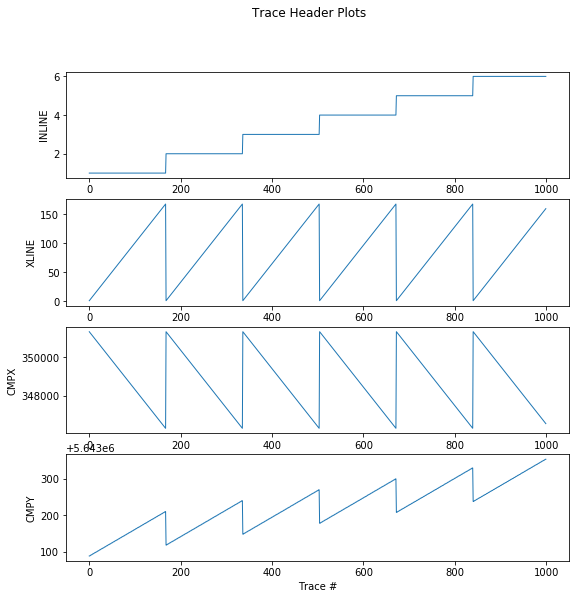

In [47]:
# Let's do something useful to inspect our data

# Read headers from the first 1000 traces in the SEG-Y and plot them
# using matplotlib.  
thead = buf.read_thead_multi(0, 1000)

# create an array of trace index numbers (to use for plotting)
tnum = np.arange(0, 1000)

# create a figure
fig = plt.figure(num=1, figsize=(9, 9))
fig.clf()

# add some axes
ax1 = fig.add_subplot(411)
ax2 = fig.add_subplot(412)
ax3 = fig.add_subplot(413)
ax4 = fig.add_subplot(414)

fig.suptitle('Trace Header Plots')

# plot inline numbers
ax1.plot(tnum, thead['il'])
ax1.set_xlabel('Trace #')
ax1.set_ylabel('INLINE')

# plot xline numbers
ax2.plot(tnum, thead['xl'])
ax2.set_xlabel('Trace #')
ax2.set_ylabel('XLINE')

# plot cmpx coordinates
ax3.plot(tnum, thead['cmpx'])
ax3.set_xlabel('Trace #')
ax3.set_ylabel('CMPX')

# plot cmpy cordinates
ax4.plot(tnum, thead['cmpy'])
ax4.set_xlabel('Trace #')
ax4.set_ylabel('CMPY')

# draw the plot
plt.show()

reading trace 5000 of 27720
reading trace 10000 of 27720
reading trace 15000 of 27720
reading trace 20000 of 27720
reading trace 25000 of 27720


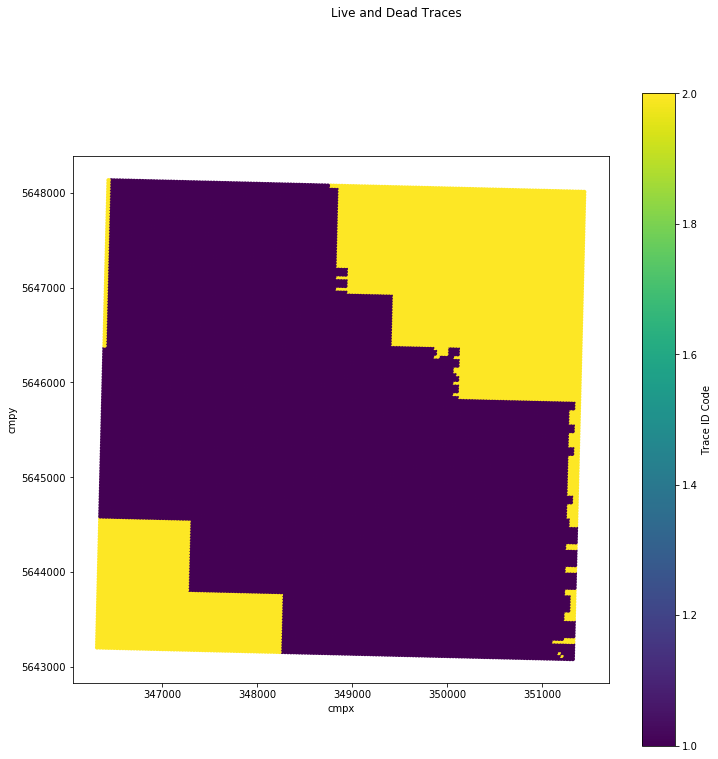

In [48]:
# Or maybe we want to read in all trace headers and plot them to see
# the survey extent

# read in all trace headers
thead = buf.read_thead_multi(0, buf.num_traces, verbose=5000)

# create a plot figure
fig = plt.figure(num=1, figsize=(12, 12))
fig.clf()

fig.suptitle('Live and Dead Traces')

# add an axes
ax1 = fig.add_subplot(111)

# plot each cmpx/cmpy location using a scatter plot and colour by the
# trace id code (i.e. the dead trace flag)
pts = ax1.scatter(thead['cmpx'], thead['cmpy'], 20, thead['idcode'], lw=0)

# add a color bar
cbar = fig.colorbar(pts, ax=ax1)
cbar.set_label('Trace ID Code')

# pretty things up
ax1.set_aspect('equal')
ax1.set_xlabel('cmpx')
ax1.set_ylabel('cmpy')

# show the plot
plt.show()

***
## Example 2: Reading Trace Data
In the last example we looked at methods for reading SEG-Y trace headers:
* buf.read_thead()
* buf.read_thead_multi()
* buf.read_thead_random()

In this example, we will look at the equivalent methods for reading SEG-Y trace data:
* buf.read_tdata()
* buf.read_tdata_multi()
* buf.read_tdata_random()
<br>

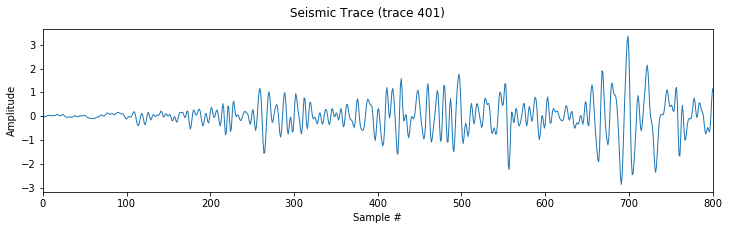

In [49]:
# Let's read data from a single trace and plot it with matplotlib

# read in the trace data for trace 401 (with index 400)
tdata = buf.read_tdata(400)

# create a figure
fig = plt.figure(num=1, figsize=(12, 3))
fig.clf()
fig.suptitle('Seismic Trace (trace 401)')

# add an axes
ax1 = fig.add_subplot(111)

# plot the trace data
ax1.plot(tdata)

# pretty up the plot
ax1.set_xlim([0, 800])
ax1.set_xlabel('Sample #')
ax1.set_ylabel('Amplitude')

plt.show()

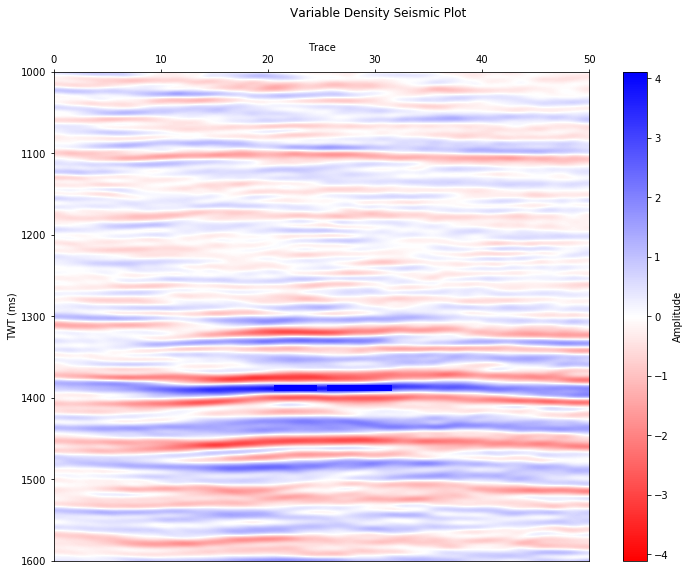

In [50]:
# Read sequential traces in SEG-Y file from 0 to 50
tdata = buf.read_tdata_multi(0, 50)

# create a figure
fig = plt.figure(num=1, figsize=(12, 9))
fig.clf()

# add an axes
ax = fig.add_subplot(111)

fig.suptitle('Variable Density Seismic Plot')

# calculate largest amplitude value in traces (for plot scaling)
plt_amp = np.max(np.abs(tdata))*0.95

# plot a VD seismic display
bbox = [0, 50, 3000, 0]
img = ax.imshow(np.transpose(tdata), extent=bbox, cmap=plt.cm.bwr_r, 
                vmin=-plt_amp, vmax=plt_amp,
                interpolation='bicubic')
cbar = fig.colorbar(img, ax=ax)
cbar.set_label('Amplitude')

# pretty up the plot
ax.xaxis.set_label_position('top')
ax.xaxis.set_ticks_position('top')
ax.set_aspect('auto')
ax.set_ylim([1600, 1000])
ax.set_xlabel('Trace')
ax.set_ylabel('TWT (ms)')

# show the plot
plt.show()

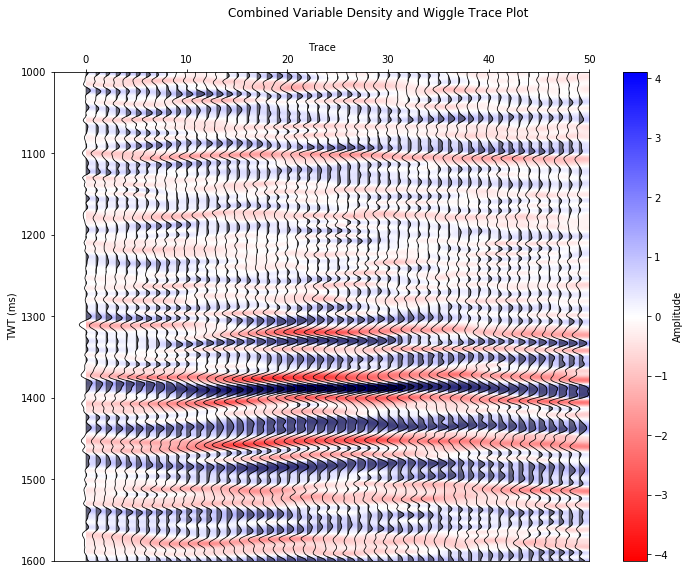

In [51]:
# Or lets use the same trace data and do a combo VD+Wiggle trace plot
fig = plt.figure(num=1, figsize=(12, 9))
fig.clf()

ax = fig.add_subplot(111)

fig.suptitle('Combined Variable Density and Wiggle Trace Plot')

# plot a VD seismic display
bbox = [0, 50, 3000, 0]
img = ax.imshow(np.transpose(tdata), extent=bbox, cmap=plt.cm.bwr_r, 
                vmin=-plt_amp, vmax=plt_amp,
                interpolation='bicubic')
cbar = fig.colorbar(img, ax=ax)
cbar.set_label('Amplitude')

# create an array for twt values of trace samples
twt = np.arange(0, buf.bhead['num_samp'])*buf.bhead['samp_rate']*0.001

# use an auralib convenience function to plot wiggle traces
aura.segy.plot_wigva(ax, tdata, twt, trcstart=0, excursion=2.0,
                     peak=True, pcolor='k', 
                     trough=False, tcolor='r', alpha=0.5,
                     line=True, lcolor='k', lw=0.75)

# pretty up the plot
ax.xaxis.set_label_position('top')
ax.xaxis.set_ticks_position('top')
ax.set_aspect('auto')
ax.set_ylim([1600, 1000])
ax.set_xlabel('Trace')
ax.set_ylabel('TWT (ms)')

# show the plot
plt.show()

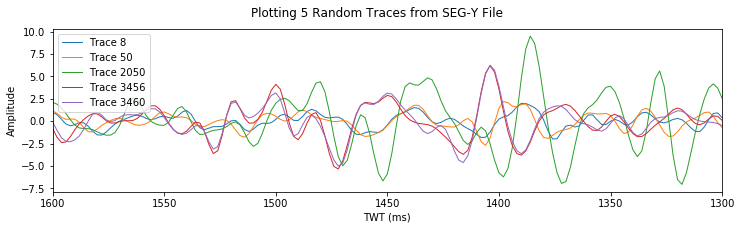

In [52]:
# Read random traces in SEG-Y file
trc_nums = [8, 50, 2050, 3456, 3460]
tdata = buf.read_tdata_random(trc_nums)

# Create a 1D numpy array of twt values corresponding to each time sample
twt = np.arange(0, buf.bhead['num_samp'])*buf.bhead['samp_rate']*0.001

# Now do plotting
fig = plt.figure(num=1, figsize=(12, 3))
fig.clf()

# add an axes
ax1 = fig.add_subplot(111)

fig.suptitle('Plotting 5 Random Traces from SEG-Y File')

# use a for loop to plot and label each trace individually
for trc_data, trc_num in zip(tdata, trc_nums):
    ax1.plot(twt, trc_data, label='Trace %i' % trc_num)

# pretty up the plot
ax1.legend()
ax1.set_xlabel('TWT (ms)')
ax1.set_ylabel('Amplitude')
ax1.set_xlim([1600, 1300])

# draw plot
plt.show()

***
## Example 3: Find Specific Inline / Xline Traces in SEG-Y File (3D Stack)
In this example we:
1. Locate traces in a SEG-Y file corresponding to a specific Inline / Xline location
1. Read and display data from the Inline / Xline location
<br>

In [53]:
# Use the buf.get_ilxl(inline, xline) method to find the trace number in 
# the segy file at inline 50, xline 55 and store it in the trc_num variable

trc_num = buf.get_ilxl(50, 55, verbose=True)


ilxl0: 500000055	ilxlg: 830000085 tg: 13860
ilxl0: 500000055	ilxlg: 420000043 tg: 6930
ilxl0: 500000055	ilxlg: 620000148 tg: 10395
ilxl0: 500000055	ilxlg: 520000095 tg: 8662
ilxl0: 500000055	ilxlg: 470000069 tg: 7796
ilxl0: 500000055	ilxlg: 490000166 tg: 8229
ilxl0: 500000055	ilxlg: 510000047 tg: 8446
ilxl0: 500000055	ilxlg: 500000107 tg: 8338
ilxl0: 500000055	ilxlg: 500000053 tg: 8284
ilxl0: 500000055	ilxlg: 500000080 tg: 8311
ilxl0: 500000055	ilxlg: 500000067 tg: 8298
ilxl0: 500000055	ilxlg: 500000060 tg: 8291
ilxl0: 500000055	ilxlg: 500000057 tg: 8288
ilxl0: 500000055	ilxlg: 500000055 tg: 8286
---Success: IL: 50 XL: 55 Trace: 8286


In [54]:
# Now, read in the trace header and trace data for trc_num

thead = buf.read_thead(trc_num)
tdata = buf.read_tdata(trc_num)

In [55]:
# Print out the contents of the thead dictionary to confirm the correct
# inline and xline values are in the trace headers

print(thead)

{'il': [50], 'xl': [55], 'cmpx': [349739.3125], 'cmpy': [5644597.0], 'idcode': [1]}


In [56]:
# Lets compare traces from two different inline/xline locations 
# and plot them for comparison

# specify two inline and xline locations
il1 = 50
xl1 = 40

il2 = 60
xl2 = 80

# get the trace numbers in the segy file corresponding to the 
# inline/xline locations
trc_num1 = buf.get_ilxl(il1, xl1)
trc_num2 = buf.get_ilxl(il2, xl2)

# print a summary to the command line
print('Summary:')
print('Inline1: %i  Xline1: %i  SegyTrc: %i' % (il1, xl1, trc_num1))
print('Inline2: %i  Xline2: %i  SegyTrc: %i' % (il2, xl2, trc_num2))

# read in the trace data for the two locations
tdata1 = buf.read_tdata(trc_num1)
tdata2 = buf.read_tdata(trc_num2)


Summary:
Inline1: 50  Xline1: 40  SegyTrc: 8271
Inline2: 60  Xline2: 80  SegyTrc: 9991


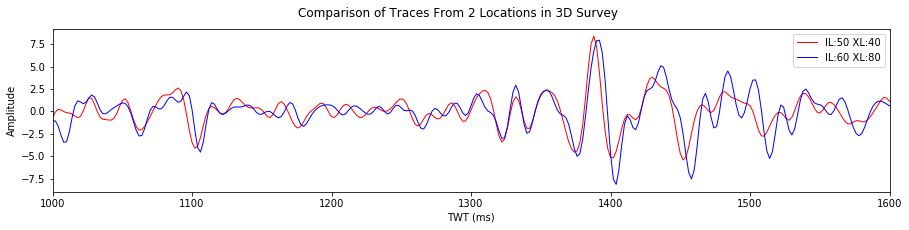

In [57]:
# create a figure
fig = plt.figure(num=1, figsize=(15, 3))
fig.clf()

# add an axes
ax1 = fig.add_subplot(111)

fig.suptitle('Comparison of Traces From 2 Locations in 3D Survey')

# plot both traces
ax1.plot(twt, tdata1, 'r', label='IL:%i XL:%i' % (il1, xl1))
ax1.plot(twt, tdata2, 'b', label='IL:%i XL:%i' % (il2, xl2))

# pretty up the plot
ax1.legend()
ax1.set_xlabel('TWT (ms)')
ax1.set_ylabel('Amplitude')
ax1.set_xlim([1000, 1600])

# show plot
plt.show()

***
## Example 4: Find Specific Inline / Xline Traces in 3D CMP Offset Gathers
In this example we:
1. Locate traces in a SEG-Y file corresponding to a specific Inline / Xline location
1. Locate in 3D CMP gathers
<br>

In [58]:
# For this example, we're going to look at a the Blackfoot 3D CMP gathers

# specify input segy file
sgyfile = r'C:\data\blackfoot\CDP\cdps_v_nowhiten_1-27720.sgy'


# create dictionary for SEG-Y trace header definition
def_thead = {'il':{'bpos':201,  'fmt':'l', 'nbyte':4},
             'xl':{'bpos':205, 'fmt':'l', 'nbyte':4},
             'cmpx':{'bpos':209, 'fmt':'ibm', 'nbyte':4},
             'cmpy':{'bpos':213, 'fmt':'ibm', 'nbyte':4},
             'offset':{'bpos':37, 'fmt':'l', 'nbyte':4},
             'idcode':{'bpos':29, 'fmt':'h', 'nbyte':2}}

# create segy object instance
buf = aura.segy.Segy(sgyfile, def_thead)

In [59]:
# Use the buf.get_ilxl() method again, but this time use the multi=200 arguement.
# This searches 200 traces around the first inline/xline match to find adjacent
# traces with the same inlne/xline value (as is often the case with CMP gathers)

trc = buf.get_ilxl(20, 55, multi=200)
print(trc)

[24335, 24336, 24337, 24338, 24339, 24340, 24341, 24342, 24343, 24344, 24345, 24346, 24347, 24348, 24349, 24350, 24351, 24352, 24353, 24354, 24355, 24356, 24357, 24358, 24359, 24360, 24361, 24362, 24363, 24364, 24365, 24366, 24367, 24368, 24369, 24370, 24371, 24372, 24373, 24374, 24375]


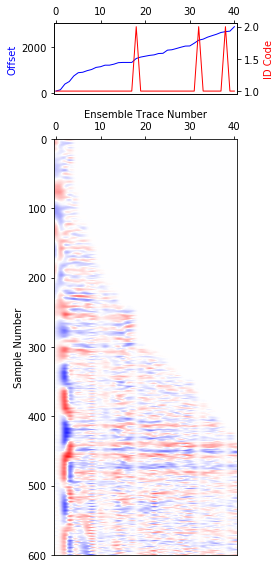

In [60]:
# Now, use the buf.read_thead_random() and buf.read_tdata_random() methods to
# read in the traces at the desired inline/xline location 
thead = buf.read_thead_random(trc, verbose=100)
tdata = buf.read_tdata_random(trc, tmin=0.5, tmax=1.7, verbose=100)

# For convenience, convert from Python lists to numpy arrays
trc = np.array(trc)
tdata = np.array(tdata)

# create a figure
fig = plt.figure(num=1, figsize=(4, 8))
fig.clf()

# add some axes for plotting header and trace data
ax1a = plt.subplot2grid((5, 1), (0, 0))
ax1b = plt.twinx(ax1a)
ax2 = plt.subplot2grid((5, 1), (1, 0), rowspan=5, sharex=ax1a)

# plot src-rec offsets
ax1a.plot(thead['offset'], 'b')
ax1a.set_ylabel('Offset', color='b')

# plot trace id codes
ax1b.plot(thead['idcode'], 'r')
ax1b.set_ylabel('ID Code', color='r')

# plot a VD seismic display
ax2.imshow(aura.utils.clip_seis_amp(tdata.T, -5, 5),
           cmap=plt.cm.bwr_r, interpolation='bicubic')

# pretty up the plot
ax2.set_aspect('auto')
ax2.set_xlabel('Ensemble Trace Number')
ax2.set_ylabel('Sample Number')

for ax in fig.get_axes():
    ax.xaxis.set_ticks_position('top')
    ax.xaxis.set_label_position('top')

fig.tight_layout()

# show the plot
plt.show()

***
## Example 5: SEG-Y Indexing - 3D Stack
In this example we:
1. Build a SEG-Y index file (for 3D survey)
1. Use the SEG-Y index file to quickly get trace numbers corresponding to specific inline/xline locations
<br>

In [61]:
# We first need to build an index file by "indexing" a SEG-Y file for a 3D survey

# Specify paths to the input SEG-Y and the ouput INDEX file (which will be created)
sgyfile = r'C:\Users\whamlyn\Documents\Dropbox\data\Blackfoot\VERTIMIG.sgy'
idxfile = r'C:\Users\whamlyn\Documents\Dropbox\data\Blackfoot\VERTIMIG.idx'

# SEGY indexing requires, at minimum, the inline and xline trace header keys
# to be defined as below. Keys must be named 'il' and 'xl.
def_thead = {'il': {'bpos': 193, 'fmt': 'l', 'nbyte': 4},
             'xl': {'bpos': 197, 'fmt': 'l', 'nbyte': 4}}

# Create a SegyIndex buffer object
idxbuf = aura.segyidx.SegyIndex(idxfile)

# Run the build_segy_index() method to run indexing on the SEGY file
idxbuf.build_segy_index(sgyfile, def_thead)

reading trace 1000 of 27720
reading trace 2000 of 27720
reading trace 3000 of 27720
reading trace 4000 of 27720
reading trace 5000 of 27720
reading trace 6000 of 27720
reading trace 7000 of 27720
reading trace 8000 of 27720
reading trace 9000 of 27720
reading trace 10000 of 27720
reading trace 11000 of 27720
reading trace 12000 of 27720
reading trace 13000 of 27720
reading trace 14000 of 27720
reading trace 15000 of 27720
reading trace 16000 of 27720
reading trace 17000 of 27720
reading trace 18000 of 27720
reading trace 19000 of 27720
reading trace 20000 of 27720
reading trace 21000 of 27720
reading trace 22000 of 27720
reading trace 23000 of 27720
reading trace 24000 of 27720
reading trace 25000 of 27720
reading trace 26000 of 27720
reading trace 27000 of 27720
Finished reading SEG-Y headers.
Finished building sequential trace numbers.
Converting trace header lists to numpy arrays...
Done! (0.000000e+00 seconds)
Getting Inline and Crossline statistics...
Done!
Starting the loops for 

In [62]:
# Now that the index file is created, we can use it to quickly find trace numbers in
# the SEG-Y file corresponding to specific inline/xline locations

# use the idxbuf.get_index_tnums() method of the index object to return the starting 
# trace and the fold. A stack volume will return a fold=1, a CMP gather will
# return a fold equal to the number of traces in the gather, a fold=-1 indicates
# no traces present at that inline/xline location.

il = 20
xl = 55

trc0, fold = idxbuf.get_index_tnums(il, xl)

print('Starting Trace: %i' % trc0)
print('Fold: %i' % fold)

Starting Trace: 3246
Fold: 1


***
## Example 6: SEG-Y Indexing - 3D Offset Gathers
In this example we:
1. Use an existing SEG-Y index file to quickly get trace numbers corresponding to specific inline/xline locations in a set of CMP gathers
<br>

In [63]:
# Specify paths to the input SEGY file and the existing INDEX file
sgyfile = r'C:\data\blackfoot\CDP\cdps_v_nowhiten_1-27720.sgy'
idxfile = r'C:\data\blackfoot\CDP\cdps_v_nowhiten_1-27720.idx'

# set up a trace header dictionary
def_thead = {'il':{'bpos':201,  'fmt':'l', 'nbyte':4},
             'xl':{'bpos':205, 'fmt':'l', 'nbyte':4},
             'cmpx':{'bpos':209, 'fmt':'ibm', 'nbyte':4},
             'cmpy':{'bpos':213, 'fmt':'ibm', 'nbyte':4},
             'offset':{'bpos':37, 'fmt':'l', 'nbyte':4},
             'idcode':{'bpos':29, 'fmt':'h', 'nbyte':2}}

# Create Segy and SegyIndex object instances
sgybuf = aura.segy.Segy(sgyfile, def_thead)
idxbuf = aura.segyidx.SegyIndex(idxfile)

# Uncommenting the line below will run the actual indexing on the CMP gathers, this can take a little while
#idxbuf.build_segy_index(sgyfile, def_thead)

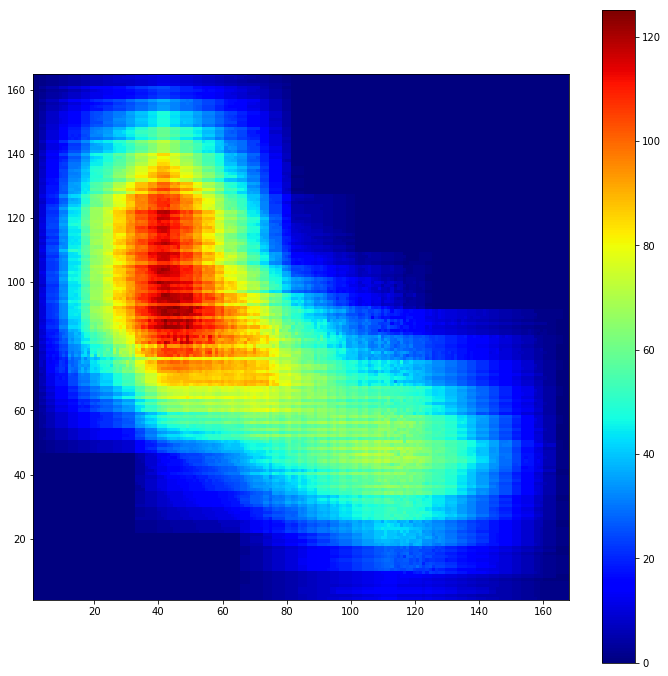

In [67]:
# Now, let's do some stuff with the index file...

# Lets look at creating an approximage fold map using the CMP gather index file
# (to make it an actual fold map we'd have to account for dead traces, but we're 
# going to ignore that for now)

# Set some variables based on the inline and xline ranges
il_num = idxbuf.il_num
il_min = idxbuf.il_min
il_max = il_min + il_num - 1

xl_num = idxbuf.xl_num
xl_min = idxbuf.xl_min
xl_max = xl_min + xl_num - 1

# Create a 2D array to store the fold data (inlines in rows, xlines in columns)
foldarray = np.zeros([il_num, xl_num])

# Definte two arrays containing all inline and xline numbers in the survey
il = np.linspace(il_min, il_max, il_num, dtype='int')
xl = np.linspace(xl_min, xl_max, xl_num, dtype='int')

# Now, use the SegyIndex().get_index_tnums(inline, xline) method to read the first trace
# number in a CMP and the number of traces (the fold) in the CMP
for i in il:
    for x in xl:
        trc, fold = idxbuf.get_index_tnums(i, x)
        ili = i-1
        xli = x-1
        foldarray[ili, xli] = fold

# Now, do the plotting
fig = plt.figure(num=1, figsize=(12, 12))
fig.clf()

ax1 = fig.add_subplot(111)

img = ax1.imshow(np.flipud(np.fliplr(foldarray)), extent=[xl_min, xl_max, il_min, il_max], cmap=plt.cm.jet)
fig.colorbar(img, ax=ax1)
ax1.set_aspect('equal')

plt.show()

In [68]:
# Now let's get the trace numbers for every 10th CMP along inline 50

# create two lists (or any iterable) with the inlines and xlines where
# we want to examine CMP gathers

inlines = [50]
xlines = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]

# Here we use a for loop to iterate over the lists of inline and xline numbers
# and create a 3rd list of trace numbers in the SEG-Y file corresponding
# to the inline/xlines
trc_nums = [] # empty list to store SEG-Y trace numbers
for il in inlines:
    for xl in xlines:
        
        # get the start trace and fold of each CMP
        trc0, fold = idxbuf.get_index_tnums(il, xl)
        
        # create a list of trace numbers in SEG-Y for for this il/xl loation
        tmp_trcs = np.arange(trc0, trc0+fold)
        tmp_trcs.tolist()
        
        #print(tmp_trcs)
        trc_nums.extend(tmp_trcs)

# Now, read in the trace header and trace data for each desired CMP
thead = sgybuf.read_thead_random(trc_nums)
tdata = sgybuf.read_tdata_random(trc_nums)

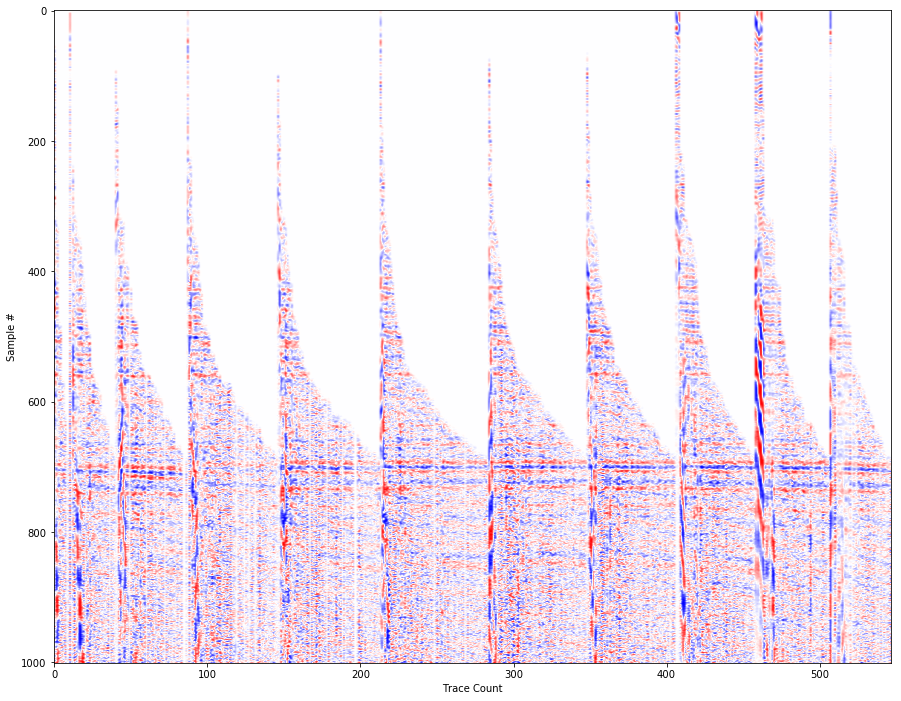

In [70]:
# Plot the CMP gather data

# create a figure
fig =  plt.figure(num=1, figsize=(15, 12))
fig.clf()

# add an axes
ax1 = fig.add_subplot(111)

# make a VD plot of the seismic data from each CMP gather
ax1.imshow(np.transpose(aura.utils.clip_seis_amp(tdata, -3, 3)), cmap=plt.cm.bwr_r,
           interpolation='bicubic')

ax1.set_aspect('auto')
ax1.set_xlabel('Trace Count')
ax1.set_ylabel('Sample #')

# draw the plot
plt.show()


## Thank You